## Load Python Libraries Here

In [61]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
import tensorflow
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.utils import gen_batches
import networkx as nx
import matplotlib.pyplot as plt
import re
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import json

## Read Dataset

In [2]:
# Importing data set
df = pd.read_csv("recipes_data.csv")
df.head(5)

title                                        ingredients  \
0    No-Bake Nut Cookies  ["1 c. firmly packed brown sugar", "1/2 c. eva...   
1  Jewell Ball'S Chicken  ["1 small jar chipped beef, cut up", "4 boned ...   
2            Creamy Corn  ["2 (16 oz.) pkg. frozen corn", "1 (8 oz.) pkg...   
3          Chicken Funny  ["1 large whole chicken", "2 (10 1/2 oz.) cans...   
4   Reeses Cups(Candy)    ["1 c. peanut butter", "3/4 c. graham cracker ...   

                                          directions  \
0  ["In a heavy 2-quart saucepan, mix brown sugar...   
1  ["Place chipped beef on bottom of baking dish....   
2  ["In a slow cooker, combine all ingredients. C...   
3  ["Boil and debone chicken.", "Put bite size pi...   
4  ["Combine first four ingredients and press in ...   

                                              link    source  \
0   www.cookbooks.com/Recipe-Details.aspx?id=44874  Gathered   
1  www.cookbooks.com/Recipe-Details.aspx?id=699419  Gathered   
2   www.cookbooks.com/Recipe-Details.aspx?id=10570  Gathered   
3  www.cookbooks.com/Recipe-Details.aspx?id=897570  Gathered   
4  www.cookbooks.com/Recipe-Details.aspx?id=659239  Gathered   

                                                 NER               site  
0  ["bite size shredded rice biscuits", "vanilla"...  www.cookbooks.com  
1  ["cream of mushroom soup", "beef", "sour cream...  www.cookbooks.com  
2  ["frozen corn", "pepper", "cream cheese", "gar...  www.cookbooks.com  
3  ["chicken gravy", "cream of mushroom soup", "c...  www.cookbooks.com  
4  ["graham cracker crumbs", "powdered sugar", "p...  www.cookbooks.com

## What fields are in the data?

In [3]:
df.columns.tolist()

['title', 'ingredients', 'directions', 'link', 'source', 'NER', 'site']

## How do fields in the data relate to each other?

<span style="color:blue">All the fields are related to recipes:-</span>

<span style="color:blue">
<ul>
    <li>title is the name of recipe. </li>
    <li>Each recipe consist of ingredients</li>
    <li>and to make recipe we need instructions or directions. </li>
    <li>Link shows the details related to recipe online. </li>
    <li>Source shows the origin of recipe from where we get this recipe.</li>  
    <li>NER is the ingredient names without quantities and units</li>
    <li>site is the URL.</li>
    </ul>    
    </span>

## Convert NER column JSON to List datatype

In [4]:
# Converting from json to array and then to numpy array
df["NER"] = df["NER"].apply(lambda x: np.array(json.loads(x)))

## Make Feature No_of_Steps_to_make_recipe

- The total steps required to make a recipe

In [5]:
# Assuming your DataFrame is named "df"
df['directions'] = df['directions'].apply(eval)  # Convert directions column to list type

In [6]:
df['No_of_Steps_to_make_recipe'] = df['directions'].apply(lambda x: len(x))
df.head(5)

title                                        ingredients  \
0    No-Bake Nut Cookies  ["1 c. firmly packed brown sugar", "1/2 c. eva...   
1  Jewell Ball'S Chicken  ["1 small jar chipped beef, cut up", "4 boned ...   
2            Creamy Corn  ["2 (16 oz.) pkg. frozen corn", "1 (8 oz.) pkg...   
3          Chicken Funny  ["1 large whole chicken", "2 (10 1/2 oz.) cans...   
4   Reeses Cups(Candy)    ["1 c. peanut butter", "3/4 c. graham cracker ...   

                                          directions  \
0  [In a heavy 2-quart saucepan, mix brown sugar,...   
1  [Place chipped beef on bottom of baking dish.,...   
2  [In a slow cooker, combine all ingredients. Co...   
3  [Boil and debone chicken., Put bite size piece...   
4  [Combine first four ingredients and press in 1...   

                                              link    source  \
0   www.cookbooks.com/Recipe-Details.aspx?id=44874  Gathered   
1  www.cookbooks.com/Recipe-Details.aspx?id=699419  Gathered   
2   www.cookbooks.com/Recipe-Details.aspx?id=10570  Gathered   
3  www.cookbooks.com/Recipe-Details.aspx?id=897570  Gathered   
4  www.cookbooks.com/Recipe-Details.aspx?id=659239  Gathered   

                                                 NER               site  \
0  [bite size shredded rice biscuits, vanilla, br...  www.cookbooks.com   
1  [cream of mushroom soup, beef, sour cream, chi...  www.cookbooks.com   
2  [frozen corn, pepper, cream cheese, garlic pow...  www.cookbooks.com   
3  [chicken gravy, cream of mushroom soup, chicke...  www.cookbooks.com   
4  [graham cracker crumbs, powdered sugar, peanut...  www.cookbooks.com   

   No_of_Steps_to_make_recipe  
0                           6  
1                           3  
2                           1  
3                           6  
4                           3

## Make Feature No_of_ingredients_in_recipe

- The total number of ingredients required to make a recipe

In [7]:
df['ingredients'] = df['ingredients'].apply(eval)  # Convert directions column to list type

In [8]:
df['No_of_ingredients_in_recipe'] = df['ingredients'].apply(lambda x: len(x))
df.head(5)

title                                        ingredients  \
0    No-Bake Nut Cookies  [1 c. firmly packed brown sugar, 1/2 c. evapor...   
1  Jewell Ball'S Chicken  [1 small jar chipped beef, cut up, 4 boned chi...   
2            Creamy Corn  [2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg. c...   
3          Chicken Funny  [1 large whole chicken, 2 (10 1/2 oz.) cans ch...   
4   Reeses Cups(Candy)    [1 c. peanut butter, 3/4 c. graham cracker cru...   

                                          directions  \
0  [In a heavy 2-quart saucepan, mix brown sugar,...   
1  [Place chipped beef on bottom of baking dish.,...   
2  [In a slow cooker, combine all ingredients. Co...   
3  [Boil and debone chicken., Put bite size piece...   
4  [Combine first four ingredients and press in 1...   

                                              link    source  \
0   www.cookbooks.com/Recipe-Details.aspx?id=44874  Gathered   
1  www.cookbooks.com/Recipe-Details.aspx?id=699419  Gathered   
2   www.cookbooks.com/Recipe-Details.aspx?id=10570  Gathered   
3  www.cookbooks.com/Recipe-Details.aspx?id=897570  Gathered   
4  www.cookbooks.com/Recipe-Details.aspx?id=659239  Gathered   

                                                 NER               site  \
0  [bite size shredded rice biscuits, vanilla, br...  www.cookbooks.com   
1  [cream of mushroom soup, beef, sour cream, chi...  www.cookbooks.com   
2  [frozen corn, pepper, cream cheese, garlic pow...  www.cookbooks.com   
3  [chicken gravy, cream of mushroom soup, chicke...  www.cookbooks.com   
4  [graham cracker crumbs, powdered sugar, peanut...  www.cookbooks.com   

   No_of_Steps_to_make_recipe  No_of_ingredients_in_recipe  
0                           6                            6  
1                           3                            4  
2                           1                            6  
3                           6                            5  
4                           3                            5

## Sort Data by Number of Ingredeints

In [9]:
df.sort_values(by='No_of_ingredients_in_recipe')

title  \
1335130  Roasted Garlic & Dill Dressing    
57305                     Cottage Cheese   
2223401    Peg's Strawberry Tarts Recipe   
1330070       Brazilian Black Bean Soup    
1933284        Bubble Gum Ice Tea Recipe   
...                                  ...   
1997023         D.I.Y Spice Blends (No3)   
719917             Dumplings And Cabbage   
27310                  Strawberry Butter   
122527                     Layered Salad   
719239       Grandma'S Chicken Fricassee   

                                               ingredients  \
1335130  [1 bulb of garlic 1cup buttermilk 1/2 cup mayo...   
57305              [any amount sour milk or fresh clabber]   
2223401                            [1 quart. strawberries]   
1330070                                      [ingredients]   
1933284         [2 ounce Bubble Gum Schnapps fill ice tea]   
...                                                    ...   
1997023  [1/2 cup dry mustard powder, 1/2 cup ground tu...   
719917   [1 c. flour, 1 egg, milk, dash of salt, 1/2 c....   
27310    [1 c. powdered sugar, 1 egg yolk, 1/2 c. butte...   
122527   [lettuce, torn into small pieces, carrots, gra...   
719239   [1 lb. chopped meat, 1 egg, 1/2 c. seasoned br...   

                                                directions  \
1335130  [cut top off garlic, drizzle small amount of o...   
57305    [Heat sour milk to a temperature of about 98° ...   
2223401  [CREAM FILLING: Beat all ingredients together ...   
1330070  [Rinse the beans. Cover them with water, and l...   
1933284                                     [Ice // rocks]   
...                                                    ...   
1997023  [Mix the ingredients together well, then trans...   
719917   [If you do not have large potatoes, use more o...   
27310    [My daughter made this soup, and I thought it ...   
122527   [This recipe was in the drawer for some years,...   
719239   [Paula and I collaborated on this recipe, and ...   

                                                      link     source  \
1335130  www.epicurious.com/recipes/member/views/roaste...   Gathered   
57305      www.cookbooks.com/Recipe-Details.aspx?id=651009   Gathered   
2223401  cookeatshare.com/recipes/peg-s-strawberry-tart...  Recipes1M   
1330070  www.epicurious.com/recipes/member/views/brazil...   Gathered   
1933284  cookeatshare.com/recipes/bubble-gum-ice-tea-94464  Recipes1M   
...                                                    ...        ...   
1997023  cookpad.com/us/recipes/367445-diy-spice-blends...  Recipes1M   
719917     www.cookbooks.com/Recipe-Details.aspx?id=301825   Gathered   
27310      www.cookbooks.com/Recipe-Details.aspx?id=301676   Gathered   
122527     www.cookbooks.com/Recipe-Details.aspx?id=301736   Gathered   
719239     www.cookbooks.com/Recipe-Details.aspx?id=301776   Gathered   

                                                       NER  \
1335130                                           [garlic]   
57305                                          [sour milk]   
2223401                                     [strawberries]   
1330070                                      [ingredients]   
1933284                                     [fill ice tea]   
...                                                    ...   
1997023  [sugar, brown sugar, anise, ground fennel seed...   
719917   [bread, sugar, brown sugar, fresh mushrooms, r...   
27310    [bisquick, bread, sugar, noodles, liquid smoke...   
122527   [sugar, chunky chicken, curry powder, accent, ...   
719239   [american cheese, sugar, noodles, accent, chil...   

                       site  No_of_Steps_to_make_recipe  \
1335130  www.epicurious.com                           1   
57305     www.cookbooks.com                           4   
2223401    cookeatshare.com                           6   
1330070  www.epicurious.com                          11   
1933284    cookeatshare.com                           1   
...                     ...             

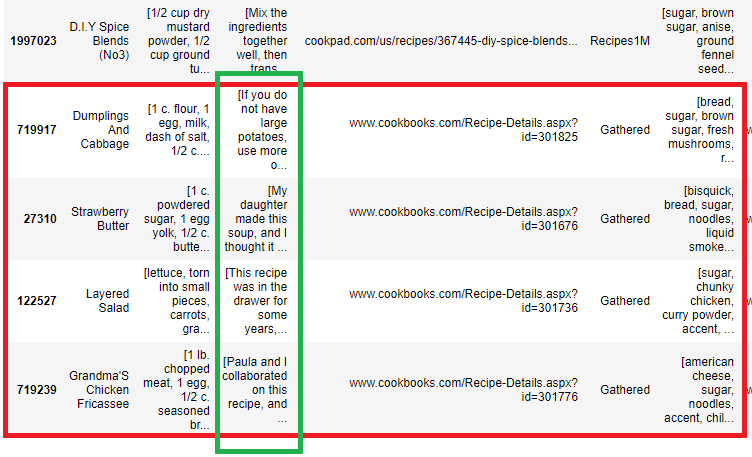

<span style="color:blue">Some recipe as shown in above figure are those where directions are not available.</span>

## Sort Data by No_of_Steps_to_make_recipe

In [10]:
df.sort_values(by='No_of_Steps_to_make_recipe')

title  \
1294279                               Broccoli Salad    
1575108                             Cape Cod Cocktail   
1273781  Grandmother Cora Horton'S Millionaire Fudge    
1575110                     Vanilla Cinnamon Smoothie   
522016                               Meringue Cookies   
...                                               ...   
2012938                       Making Egg Dough Pastas   
1702484             Cannelloni with Asparagus and Ham   
2210363                           Soft Cheesy Pretzel   
1739457                      Mike's NY Cheesecake 101   
1717085                                    Moon Cakes   

                                               ingredients  \
1294279  [2 c. chopped fresh broccoli, 1/2 c. unsalted ...   
1575108  [4 ounces, fluid Cranberry Juice, 1 ounce, flu...   
1273781  [4 1/2 c. white sugar, 1 tall can evaporated m...   
1575110  [1/2 cups Whole Milk, 3/4 cups Plain Greek Yog...   
522016   [2 large egg whites, 3/4 c. sugar, 1 tsp. vani...   
...                                                    ...   
2012938  [DRY, 2 cups all-purpose flour, WET, 9 egg yol...   
1702484  [2 pounds asparagus, 6 tablespoons butter, 1 c...   
2210363  [1 1/2 cups flour, all-purpose, 2 teaspoons ba...   
1739457  [30 Graham Crackers (crushed for crust), 4 tbs...   
1717085  [1 1/4 cups sugar, 1/4 plus 1/8 teaspoon citri...   

                                                directions  \
1294279  [Combine first ingredients and fold in with dr...   
1575108  [Pour the cranberry juice and vodka into a hig...   
1273781  [Chocolate, nuts and marshmallow stuff into a ...   
1575110  [In a blender, add all ingredients and run on ...   
522016   [Beat egg whites until foamy. Gradually add su...   
...                                                    ...   
2012938  [Measure the flour and shake it through a siev...   
1702484  [Trim 1 inch or more off the butt ends of the ...   
2210363  [Combine first 4 ingredients in a medium bowl;...   
1739457  [Preheat oven to 350 (175 degrees C)., Triple ...   
1717085  [In a small saucepan, combine the sugar, citri...   

                                                      link     source  \
1294279  www.epicurious.com/recipes/member/views/brocco...   Gathered   
1575108  tastykitchen.com/recipes/drinks/cape-cod-cockt...   Gathered   
1273781  www.epicurious.com/recipes/member/views/grandm...   Gathered   
1575110  tastykitchen.com/recipes/drinks/vanilla-cinnam...   Gathered   
522016      www.cookbooks.com/Recipe-Details.aspx?id=14161   Gathered   
...                                                    ...        ...   
2012938  www.epicurious.com/recipes/food/views/making-e...  Recipes1M   
1702484  www.cookstr.com/recipes/cannelloni-with-aspara...  Recipes1M   
2210363  recipeland.com/recipe/v/soft-cheesy-pretzel--5...  Recipes1M   
1739457  cookpad.com/us/recipes/352287-mikes-ny-cheesec...  Recipes1M   
1717085  www.epicurious.com/recipes/food/views/moon-cak...  Recipes1M   

                                                       NER  \
1294279  [fresh broccoli, wine vinegar, dressing, ¼, gr...   
1575108               [lime, fluid vodka, cranberry juice]   
1273781  [white sugar, oleo, marshmallow cream, walnuts...   
1575110                  [¼, greek yogurt, cinnamon, milk]   
522016                        [sugar, vanilla, egg whites]   
...                                                    ...   
2012938  [extra-virgin olive oil, wet, egg yolk, eggs, ...   
1702484  [nutmeg, eggs, ham, water, flour, asparagus, m...   
2210363  [baking powder, sugar, eggs, cheddar cheese, f...   
1739457  [mixing bowl, sugar, vanilla, crackers, eggs, ...   
1717085  [caramel sauce, pork fatback, sugar, eggs, siu...   

                       site  No_of_Steps_to_make_recipe  \
1294279  www.epicurious.com                           1   
1575108    tastykitchen.com                           1   
1273781  www.epicurious.com                           1   
1575110    tast

## Data Quality Checks

### (1) - Missing Values Analysis

In [11]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

title                          0
ingredients                    0
directions                     0
link                           0
source                         0
NER                            0
site                           0
No_of_Steps_to_make_recipe     0
No_of_ingredients_in_recipe    0
dtype: int64

<span style="color:blue">There is no missing values in dataset, hence no need to handle missing values. In gereneral following methods are used to handle missing values.</span>

<br>

<span style="color:blue">
    <ul>
<li>Deletion: Remove rows or columns with missing values. This can be done if the missing data is sparse and won't significantly impact the analysis.</li>

<li>Imputation: Fill in missing values with estimated or calculated values. Common imputation techniques include mean, median, mode imputation, as well as regression imputation and hot deck imputation.</li>

<li>Advanced Imputation: Utilize advanced techniques such as multiple imputation, which creates multiple imputed datasets and combines the results, or predictive modeling to estimate missing values based on the relationship with other variables.</li>

<li>Indicator Variables: Create a new binary column indicating the presence or absence of missing values in a particular variable. This allows the model to recognize and utilize the missingness pattern as a predictive feature.</li>

<li>Domain Knowledge: Utilize domain knowledge to determine meaningful ways to handle missing values. For example, for time series data, missing values may be interpolated based on previous and subsequent values.</li>

<li>Model-Based Imputation: Use machine learning algorithms to predict missing values based on other features in the dataset. This approach leverages the relationships between variables to estimate missing values.</li>

<li>Treat Missingness as a Separate Category: For categorical variables, treat missing values as a separate category rather than imputing or deleting them. This allows the model to capture any potential information contained in the missingness.</li>
    </ul></span>

### (2) - Check Data Types

In [12]:
# Check the data types of columns in the dataset
data_types = df.dtypes
data_types

title                          object
ingredients                    object
directions                     object
link                           object
source                         object
NER                            object
site                           object
No_of_Steps_to_make_recipe      int64
No_of_ingredients_in_recipe     int64
dtype: object

### (3) - Check Unique Values

In [13]:
# Check unique values in a specific column
for c in df.columns:
    try:
        unique_values = df[c].nunique()
    except:
        continue
    print(c, " has ",unique_values, " values ")

title  has  1312871  values 
link  has  2231142  values 
source  has  2  values 
site  has  28  values 
No_of_Steps_to_make_recipe  has  127  values 
No_of_ingredients_in_recipe  has  81  values 


### (4) - Boxplot Analysis/ Outlier Detection

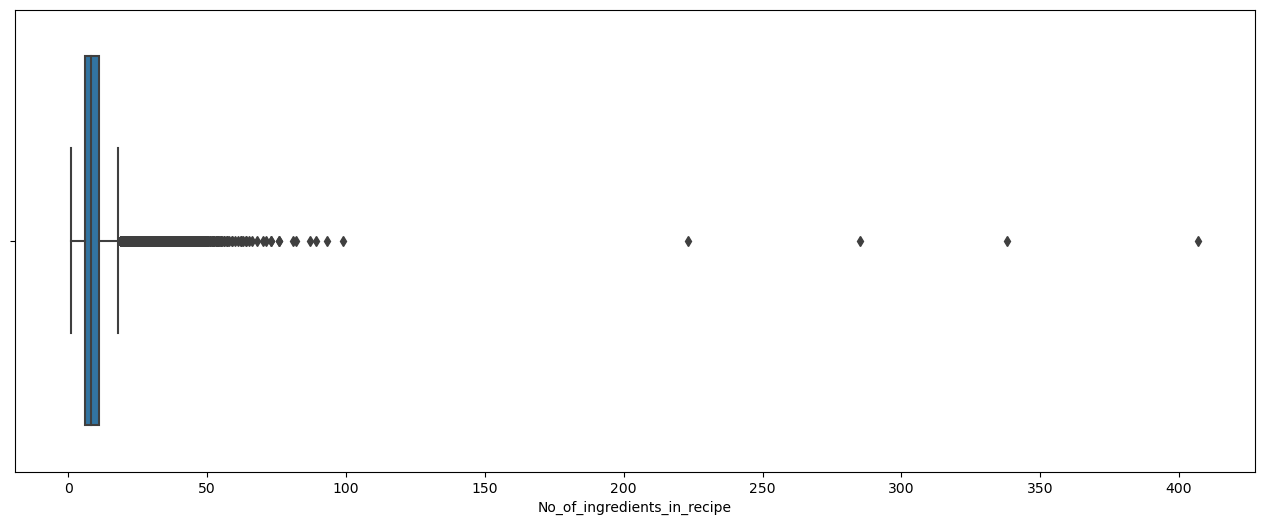

In [14]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['No_of_ingredients_in_recipe'])
plt.show()

In [15]:
df['No_of_ingredients_in_recipe'].min(), df['No_of_ingredients_in_recipe'].mean(), df['No_of_ingredients_in_recipe'].max()

(1, 8.727042474212757, 407)

<span style="color:blue">From above figure it is clear that there are outliers in data for feature No_of_ingredients_in_recipe. The average number of ingredients are around 9, and the maximum number of ingredients are 407, the range is very high, which shows the presence of outliers in data.</span>

### Lets Analyze Max number of ingredients recipe

In [16]:
max_ingredients = df[df['No_of_ingredients_in_recipe'] == df['No_of_ingredients_in_recipe'].max()]
max_ingredients

title  \
719239  Grandma'S Chicken Fricassee   

                                              ingredients  \
719239  [1 lb. chopped meat, 1 egg, 1/2 c. seasoned br...   

                                               directions  \
719239  [Paula and I collaborated on this recipe, and ...   

                                                   link    source  \
719239  www.cookbooks.com/Recipe-Details.aspx?id=301776  Gathered   

                                                      NER               site  \
719239  [american cheese, sugar, noodles, accent, chil...  www.cookbooks.com   

        No_of_Steps_to_make_recipe  No_of_ingredients_in_recipe  
719239                           4                          407

In [17]:
max_ingredients.values

array([["Grandma'S Chicken Fricassee",
        list(['1 lb. chopped meat', '1 egg', '1/2 c. seasoned bread crumbs', '2 Tbsp. ketchup', '1 tsp. salt', '1/2 tsp. pepper', '6 to 7 potatoes (medium)', '2 1/2 lb. ham end', '1 c. milk', '4 Tbsp. seasoned bread crumbs', '4 Tbsp. butter', '1 lb. ham steak, cubed', '2 c. celery, sliced', '3/4 c. mayonnaise', '1 can chunky chicken soup', '2 Tbsp. lemon juice', '3 eggs, hard-boiled and cut up', '1 (8 oz.) can mushroom stems and pieces', '1 c. walnuts', '1/2 c. butter', '2 c. stuffing mix', '12 oz. corn bread twists', '1 lb. ground ham', '1 can Cheddar cheese soup', '1 c. seasoned bread crumbs', '1 pkg. onion soup mix', '4 Tbsp. butter, divided', '4 Tbsp. flour, divided', '2 tsp. seasoned salt, divided', '2 to 2 1/2 lb. boneless veal', '1 Tbsp. paprika, divided', '1 can chicken broth', '1/2 lb. mushrooms, sliced', '2 medium onions, sliced', '1/4 c. steak sauce', 'hot buttered noodles', '1 roast beef (with or without bones, any size)', '8 oz. dital

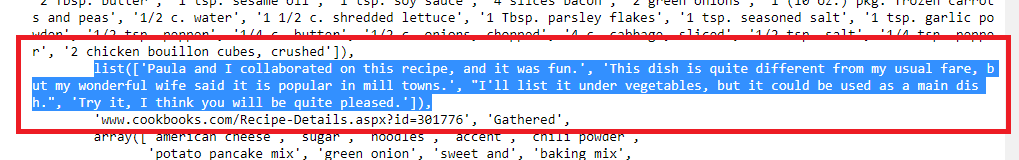

<span style="color:blue">In some recipes as shown in above image, does not have proper directions (description) is written in some recipe.</span>

In [18]:
df.head(1).values

array([['No-Bake Nut Cookies',
        list(['1 c. firmly packed brown sugar', '1/2 c. evaporated milk', '1/2 tsp. vanilla', '1/2 c. broken nuts (pecans)', '2 Tbsp. butter or margarine', '3 1/2 c. bite size shredded rice biscuits']),
        list(['In a heavy 2-quart saucepan, mix brown sugar, nuts, evaporated milk and butter or margarine.', 'Stir over medium heat until mixture bubbles all over top.', 'Boil and stir 5 minutes more. Take off heat.', 'Stir in vanilla and cereal; mix well.', 'Using 2 teaspoons, drop and shape into 30 clusters on wax paper.', 'Let stand until firm, about 30 minutes.']),
        'www.cookbooks.com/Recipe-Details.aspx?id=44874', 'Gathered',
        array(['bite size shredded rice biscuits', 'vanilla', 'brown sugar',
               'nuts', 'milk', 'butter'], dtype='<U32')                     ,
        'www.cookbooks.com', 6, 6]], dtype=object)

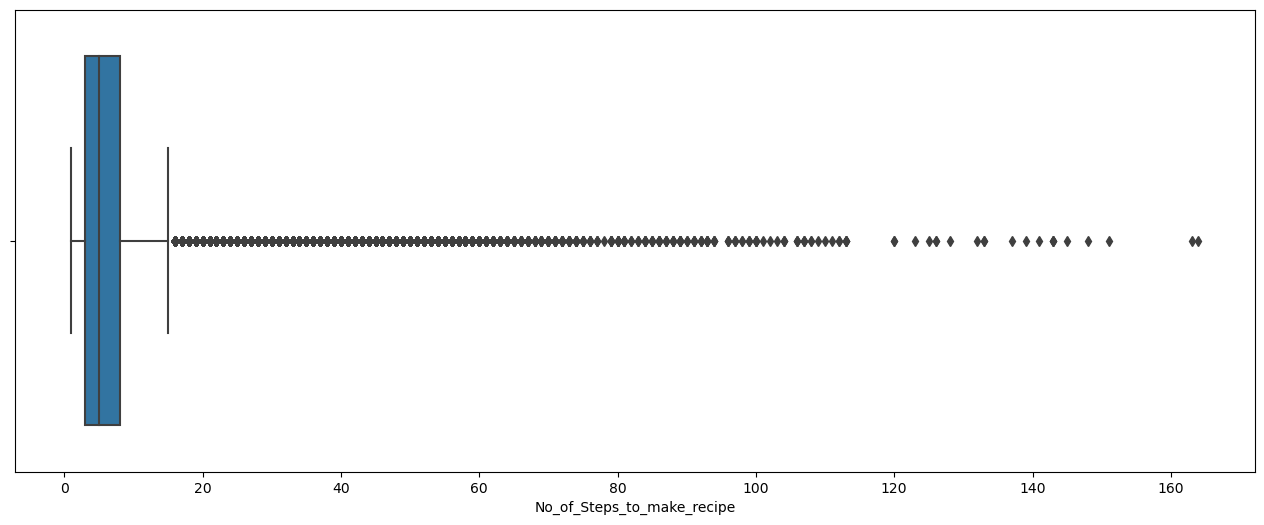

In [19]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['No_of_Steps_to_make_recipe'])
plt.show()

In [20]:
df['No_of_Steps_to_make_recipe'].min(), df['No_of_Steps_to_make_recipe'].mean(), df['No_of_Steps_to_make_recipe'].max()

(1, 6.61362790893632, 164)

<span style="color:blue">The average number of steps to make recipe is 7, but there maximum value is 164. This high rangle of average and maximum and above box plot shows that there are outliers means some recipe (a very small portion) takes very long time as compared to most of the recipes.</span>

## Issue with Textual Data

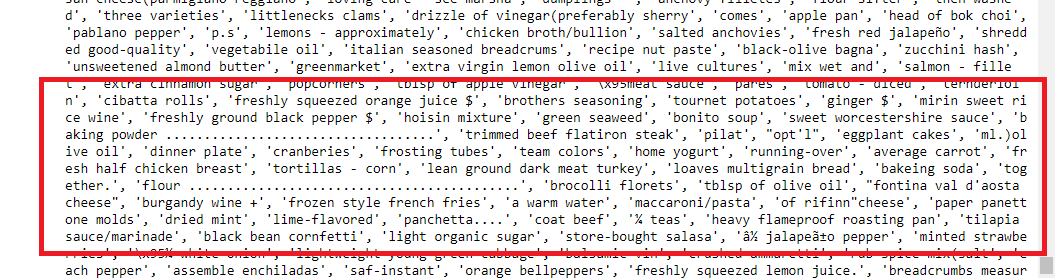

<span style="color:blue">Textual data such as ingredient names contains unnecessary characters or symbols which needs to be removed before analysis.</span>

## Exploratory Data Analysis (EDA)

In [21]:
def labeled_barplot(data, feature, perc=False, n=None, title=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    
    plt.title(title)
    plt.show()  # show the plot

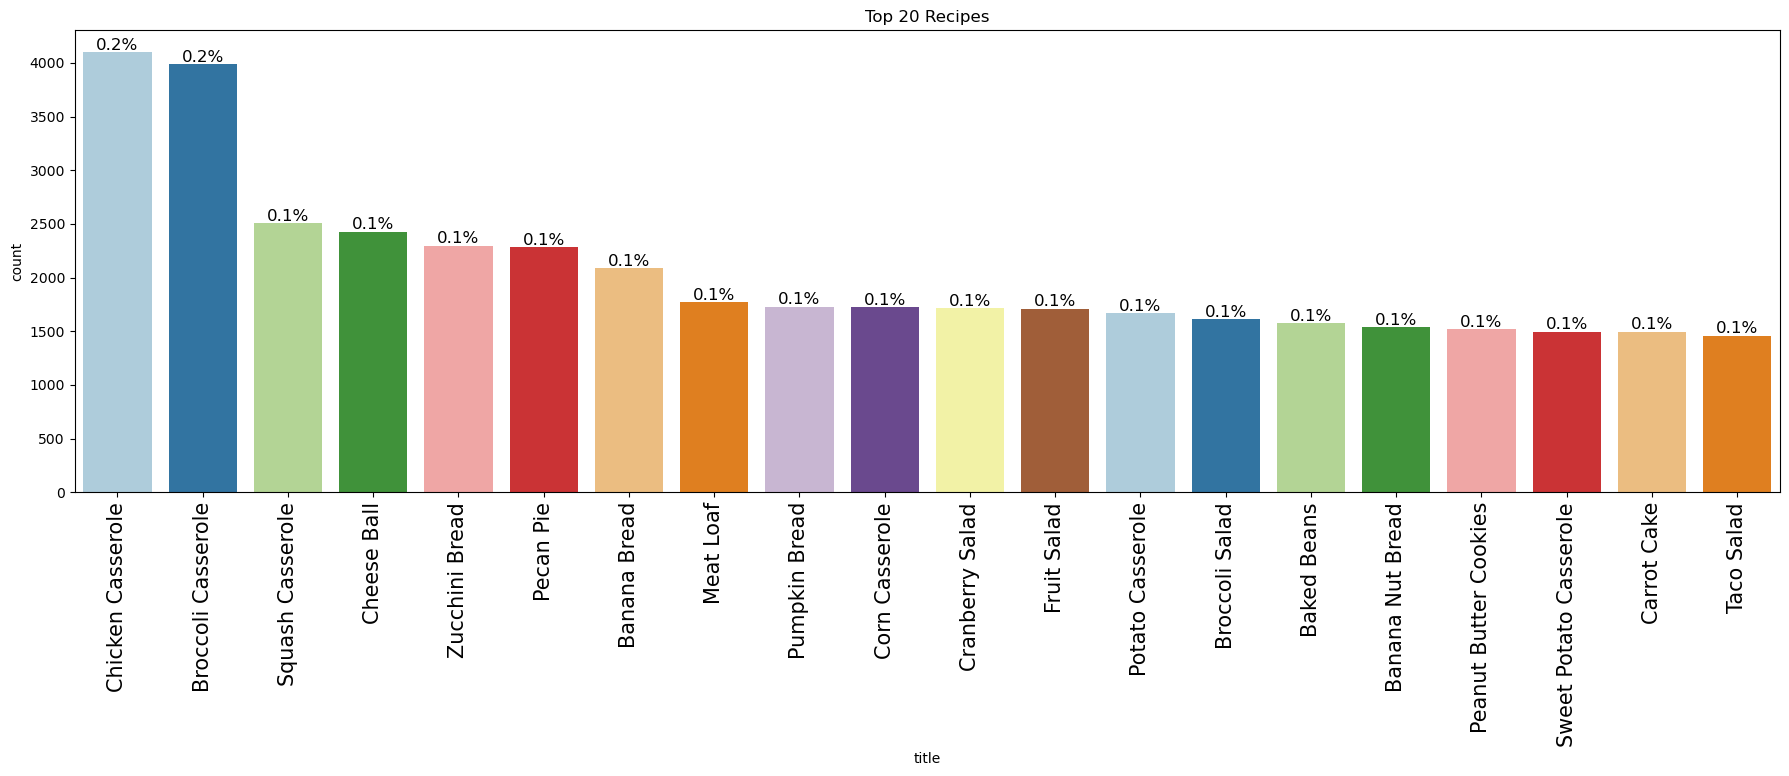

In [22]:
labeled_barplot(df, "title", perc=True, n=20, title="Top 20 Recipes")

In [17]:
df[df['title'] == "Chicken Casserole"]

title                                        ingredients  \
63       Chicken Casserole  [1 can cream of mushroom soup, 1 can cream of ...   
131      Chicken Casserole  [1/2 c. raw rice, 1 can French onion soup, 1 c...   
356      Chicken Casserole  [1 1/2 c. uncooked rice, 1 envelope onion soup...   
428      Chicken Casserole  [1 large pkg. spinach noodles, cooked in broth...   
539      Chicken Casserole  [4 c. cooked chicken, 1 c. chopped celery, 1 c...   
...                    ...                                                ...   
2155999  Chicken Casserole  [1 lb Chicken Breast (cubed), 5 Carrots (slice...   
2169171  Chicken Casserole  [1 (6 ounce) packagestove top chicken flavor s...   
2199641  Chicken Casserole  [2 cups cooked egg noodles, 2 (10 3/4 ounce) c...   
2214015  Chicken Casserole  [1 12 loaves artisan bread (example-sourdough ...   
2226534  Chicken Casserole  [1 tablespoon butter, 1 tablespoon olive oil, ...   

                                                directions  \
63       [Mix all ingredients together in baking dish.,...   
131      [Mix all together; pour into a 7 x 12-inch cas...   
356      [Spread rice in bottom of a 9 x 13-inch glass ...   
428      [Cook chicken. Saute celery, pepper and onion....   
539      [Mix first nine ingredients., Saute 5 minutes ...   
...                                                    ...   
2155999  [Preheat oven to 350F, Boil carrots, Cube chic...   
2169171  [Preheat oven to 350 degrees F., Prepare stuff...   
2199641  [Preheat oven to 350., In a large bowl, toss t...   
2214015  [At least 8 hours before you plan to serve thi...   
2226534  [Saute leek, onion and garlic in melted butter...   

                                                    link     source  \
63       www.cookbooks.com/Recipe-Details.aspx?id=665397   Gathered   
131      www.cookbooks.com/Recipe-Details.aspx?id=661800   Gathered   
356      www.cookbooks.com/Recipe-Details.aspx?id=419575   Gathered   
428        www.cookbooks.com/Recipe-Details.aspx?id=7283   Gathered   
539      www.cookbooks.com/Recipe-Details.aspx?id=115061   Gathered   
...                                                  ...        ...   
2155999  cookpad.com/us/recipes/346285-chicken-casserole  Recipes1M   
2169171     www.food.com/recipe/chicken-casserole-268828  Recipes1M   
2199641     www.food.com/recipe/chicken-casserole-228128  Recipes1M   
2214015     www.food.com/recipe/chicken-casserole-522180  Recipes1M   
2226534     www.food.com/recipe/chicken-casserole-171504  Recipes1M   

                                                       NER               site  \
63       [cream of chicken soup, cream of mushroom soup...  www.cookbooks.com   
131      [cream of chicken, onion soup, mushrooms, bite...  www.cookbooks.com   
356      [onion soup, cream of mushroom soup, water, ri...  www.cookbooks.com   
428      [velveeta cheese, chicken breasts, spinach noo...  www.cookbooks.com   
539      [cream of chicken soup, slivered almonds, lemo...  www.cookbooks.com   
...                                                    ...                ...   
2155999  [cream of chicken soup, sour cream, corn, ranc...        cookpad.com   
2169171  [velveeta cheese, condensed cream, chicken fla...       www.food.com   
2199641  [pimiento, cream of mushroom soup, sherry wine...       www.food.com   
2214015  [bread, chicken breasts, unsalted butter, heav...       www.food.com   
2226534  [corn, ground cumin, chicken breasts, potato, ...       www.food.com   

         No_of_Steps_to_make_recipe  No_of_ingredients_in_recipe  
63                                3                            6  
131                               3                            5  
356                               4                            5  
428                               1                            8  
539                               4                           12  
...                             ...                          ...  
2155999 

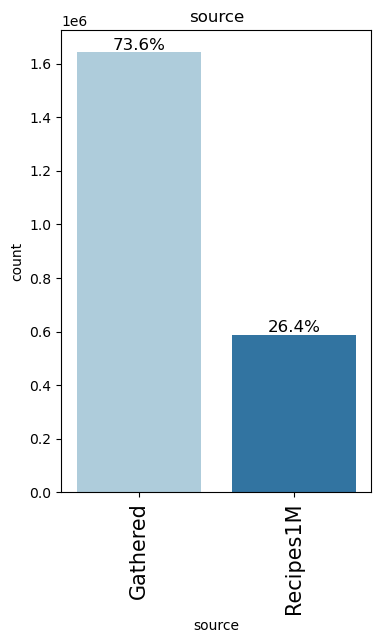

In [154]:
labeled_barplot(df, "source", perc=True, n=2, title="source")

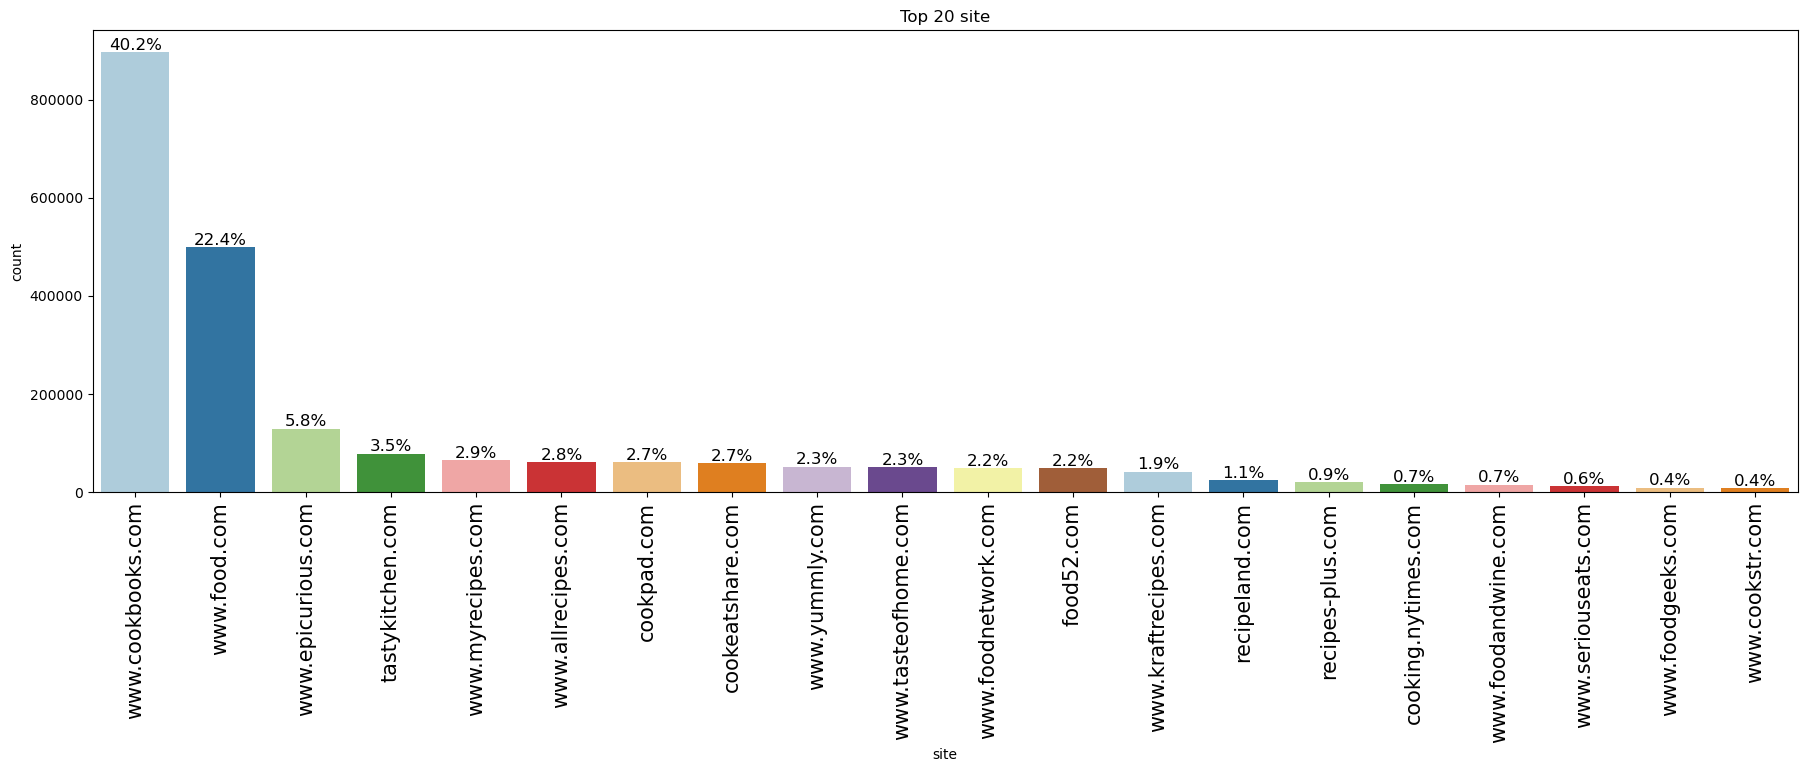

In [158]:
labeled_barplot(df, "site", perc=True, n=20, title="Top 20 site")

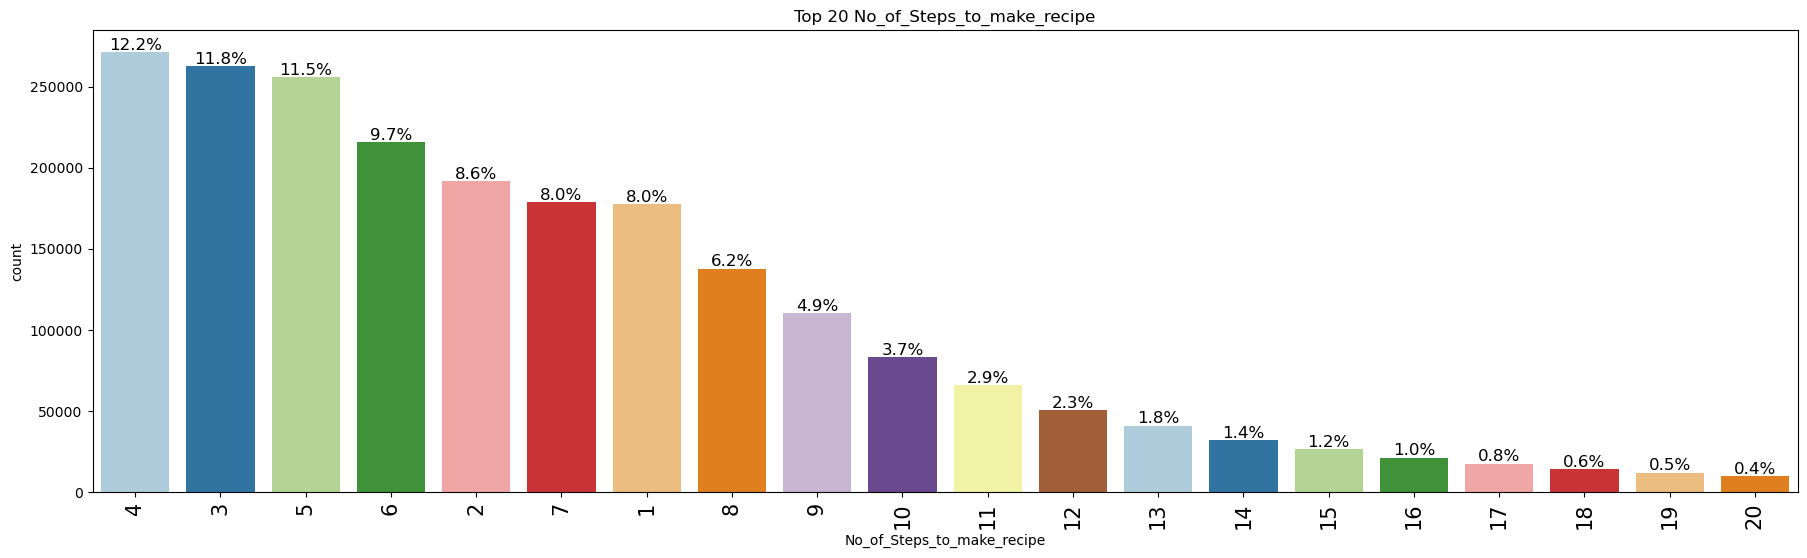

In [18]:
labeled_barplot(df, "No_of_Steps_to_make_recipe", perc=True, n=20, title="Top 20 No_of_Steps_to_make_recipe")

<span style="color:blue">Most of the recipes required around 1 to 8 steps to make recipes. THere are some recipes which required large number of steps.</span>

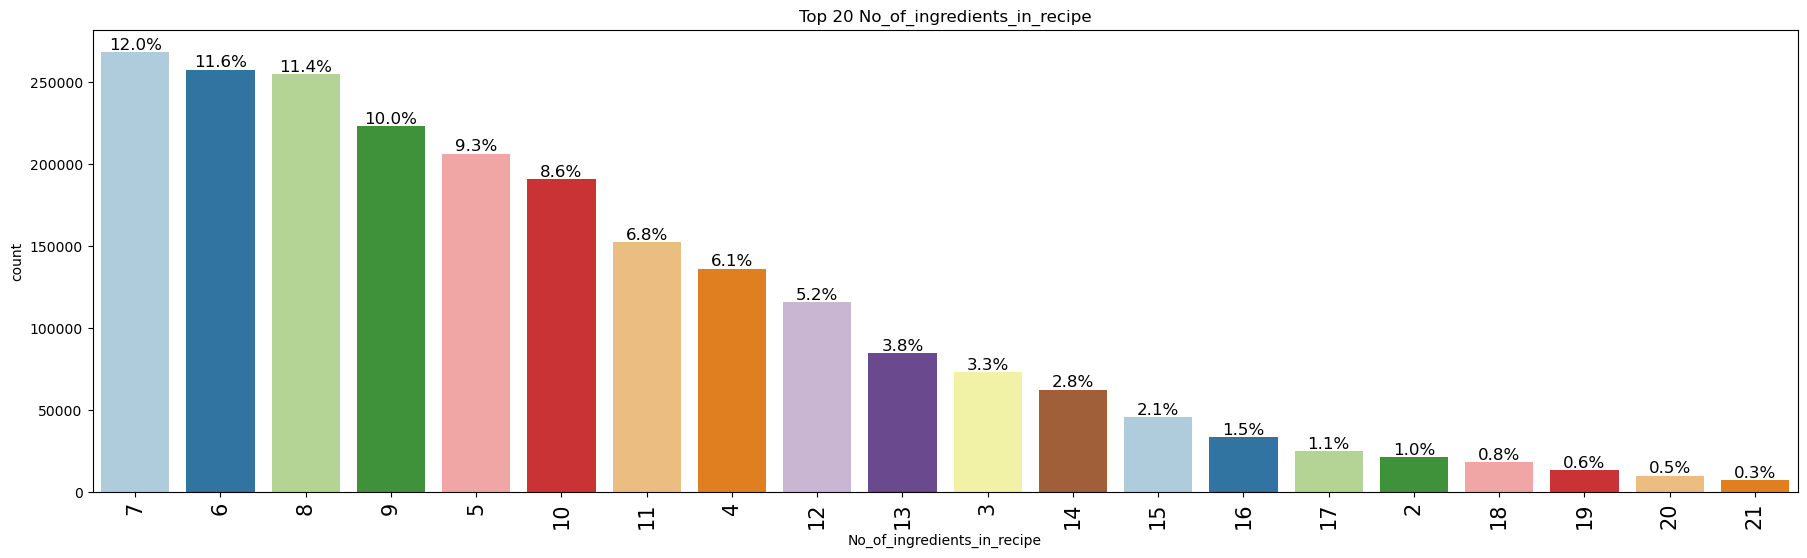

In [19]:
labeled_barplot(df, "No_of_ingredients_in_recipe", perc=True, n=20, title="Top 20 No_of_ingredients_in_recipe")

<span style="color:blue">Most recipes consist of ingredients range from 4 to 11. Some recipes consist of very large number of ingredients.</span>

## Importance of Ingredients


<span style="color:blue">Here i have plotted the ingredients and their usage in recipes, which shows the importance of recipes. Egg,sugar and salt being the most important ingredients used in recipes.</span>

In [20]:
ner = df.ingredients.explode().reset_index()

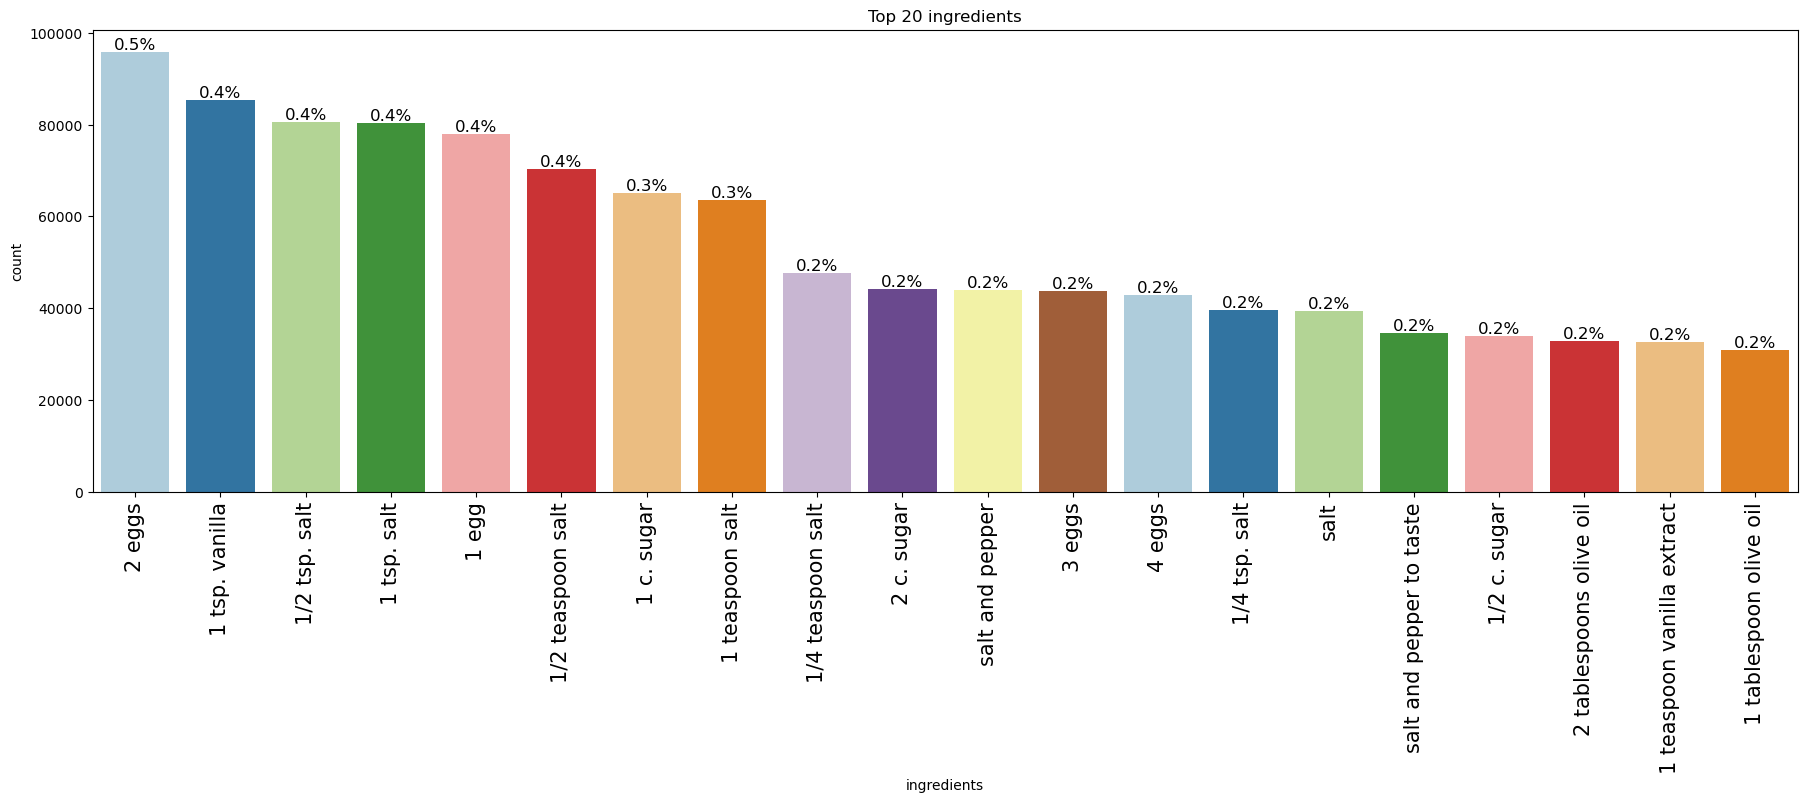

In [21]:
labeled_barplot(ner, "ingredients", perc=True, n=20, title="Top 20 ingredients")

## Identify All Ingredients Used

<span style="color:blue">Use the explode() method and then call the unique() method.</span>

In [22]:
ingredients = df.ingredients.explode().unique()
ingredients

array(['1 c. firmly packed brown sugar', '1/2 c. evaporated milk',
       '1/2 tsp. vanilla', ..., '1/2 cup very cold seltzer water',
       '1 cup neutral oil, like canola',
       '1/2 cup freshly grated Pecorino Romano cheese, plus more for sprinkling'],
      dtype=object)

In [23]:
print(f"Total Unique Ingredients are {len(ingredients)}")

Total Unique Ingredients are 4682802


## Word Cloud Analysis of Recipes

In [130]:
stopwords = ['dtype', 'array', 'of', 'the', 'in', 'with', 'or', 'whole', 'all', 'a', 'that', 'using', 'at',
            'and','for','to','until','is', 'then', 'on',"'","U22'","U13'","U32'","U27'","U37'"]

def minimal_wordcloud(df, column):
    text = str(df[column].values)
    wordcloud = WordCloud(width=1000, height=500, stopwords = stopwords).generate(text)
    image = wordcloud.to_image()
    return image

## Top/ Important Recipes

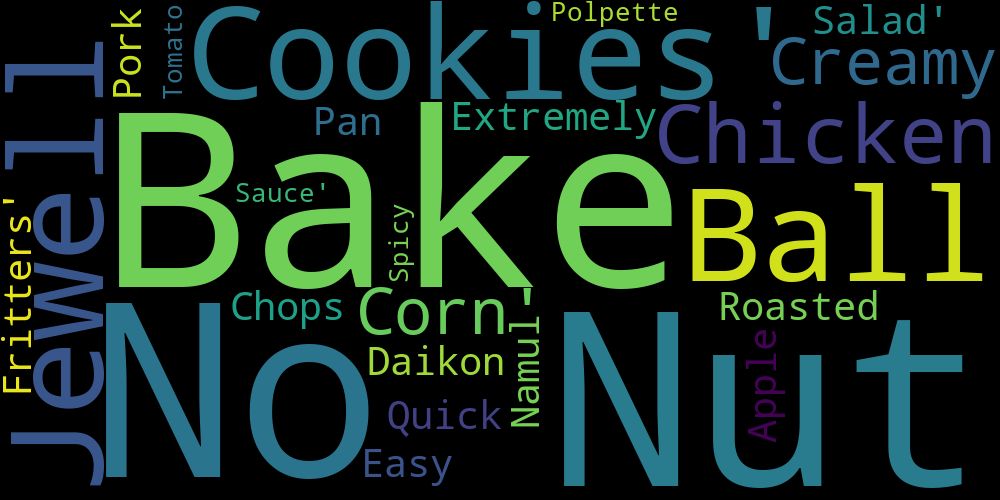

In [159]:
minimal_wordcloud(df, 'title')

## Top/ Important Ingredients/ Units/ Quantities

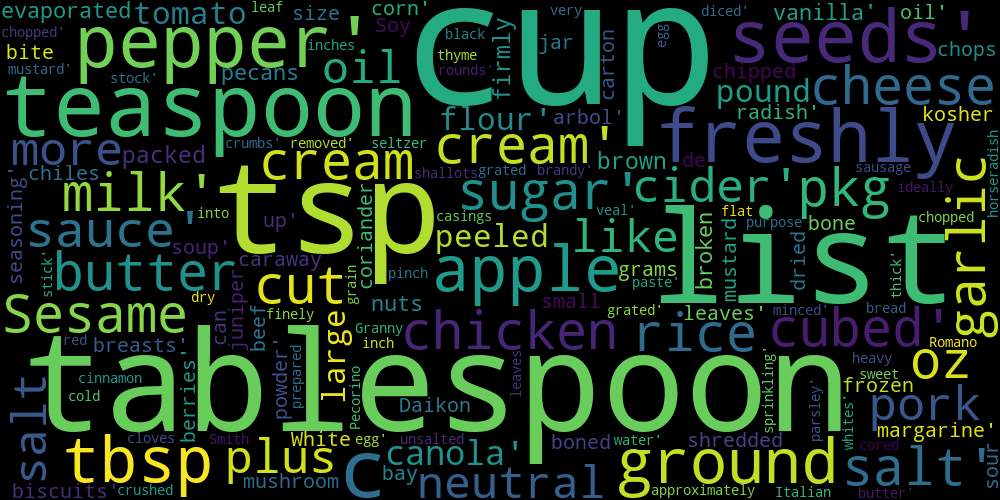

In [160]:
minimal_wordcloud(df, 'ingredients')

## Top/ Important Directions Words

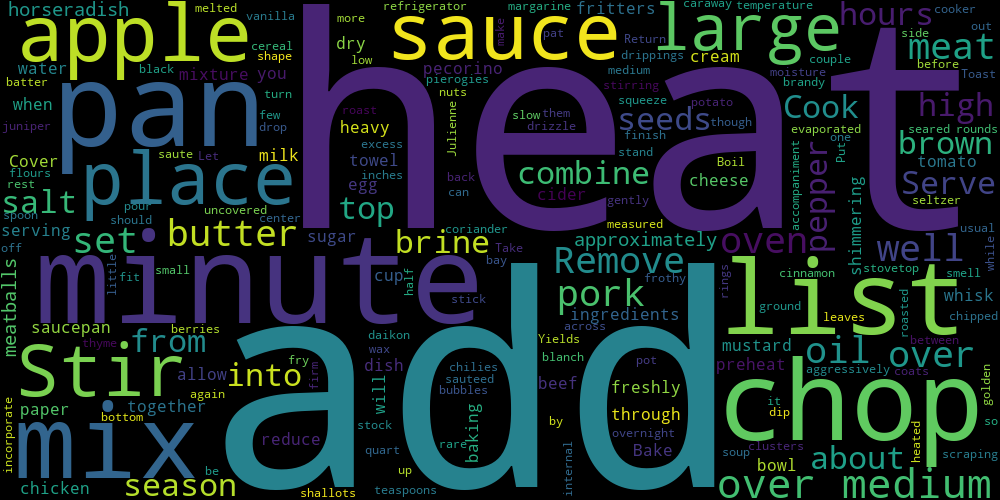

In [161]:
minimal_wordcloud(df, 'directions')

## Top/ Important Words in NER

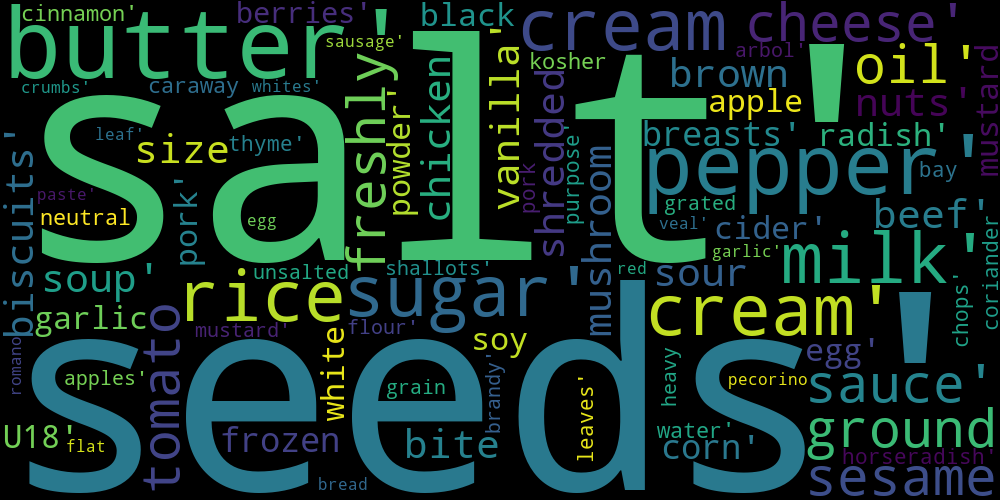

In [134]:
minimal_wordcloud(df, 'NER')

## For 100 common ingredients

- Find the other ingredients they are most often used with each other.

In [36]:
ingredient_uses = df[["title", "NER"]].explode("NER")
ingredient_uses = ingredient_uses.rename(columns={"NER": "ingredient"})
ingredient_uses

title                        ingredient
0                   No-Bake Nut Cookies  bite size shredded rice biscuits
0                   No-Bake Nut Cookies                           vanilla
0                   No-Bake Nut Cookies                       brown sugar
0                   No-Bake Nut Cookies                              nuts
0                   No-Bake Nut Cookies                              milk
...                                 ...                               ...
2231141  Polpette in Spicy Tomato Sauce                      tomato sauce
2231141  Polpette in Spicy Tomato Sauce                            garlic
2231141  Polpette in Spicy Tomato Sauce                           sausage
2231141  Polpette in Spicy Tomato Sauce                      bread crumbs
2231141  Polpette in Spicy Tomato Sauce                              salt

[18420503 rows x 2 columns]

### Pick 20 common ingredients

This portion shows the ingredient and top 10 similar or related ingredients.

In [169]:
all_ingredients = ingredient_uses.ingredient.value_counts().head(20).index.tolist()
for i in all_ingredients:
    # Find id's of recipes using the ingredient
    id_list = ingredient_uses[ingredient_uses.ingredient == i].index.unique()
    # Find all rows for the above id's and do value_counts on those rows
    print(i, "with", ingredient_uses[ingredient_uses.index.isin(id_list)].ingredient.value_counts().head(10).index.tolist()[1:])
    print()

salt with ['flour', 'sugar', 'butter', 'eggs', 'onion', 'garlic', 'milk', 'water', 'pepper']

sugar with ['salt', 'flour', 'eggs', 'vanilla', 'butter', 'milk', 'water', 'baking powder', 'baking soda']

butter with ['salt', 'flour', 'sugar', 'eggs', 'milk', 'vanilla', 'brown sugar', 'onion', 'baking powder']

flour with ['salt', 'sugar', 'eggs', 'butter', 'vanilla', 'milk', 'baking powder', 'baking soda', 'egg']

eggs with ['salt', 'sugar', 'flour', 'butter', 'vanilla', 'milk', 'baking powder', 'baking soda', 'brown sugar']

onion with ['salt', 'garlic', 'pepper', 'water', 'butter', 'tomatoes', 'celery', 'olive oil', 'milk']

garlic with ['salt', 'onion', 'olive oil', 'tomatoes', 'water', 'butter', 'pepper', 'parsley', 'oregano']

milk with ['salt', 'sugar', 'flour', 'butter', 'eggs', 'vanilla', 'baking powder', 'onion', 'egg']

water with ['salt', 'sugar', 'flour', 'onion', 'butter', 'garlic', 'eggs', 'milk', 'pepper']

vanilla with ['sugar', 'flour', 'eggs', 'salt', 'butter', 'milk', 

## Network Analysis of Ingredients

- I have used only subset of the data for this analysis, because actual data was very large
- I have considered only top 20 ingredients and their corelated top 10 ingredients.

In [173]:
all_ingredients = ingredient_uses.ingredient.value_counts().head(20).index.tolist()

In [179]:
network_data = []

for i in all_ingredients:
    
    # Find id's of recipes using the ingredient
    id_list = ingredient_uses[ingredient_uses.ingredient == i].index.unique()
    
    # Find all rows for the above id's and do value_counts on those rows
    for j in ingredient_uses[ingredient_uses.index.isin(id_list)].ingredient.value_counts().head(10).index.tolist()[1:]:
        i = " ".join(re.findall(r'[a-zA-Z]+', i))
        j = " ".join(re.findall(r'[a-zA-Z]+', j))
        network_data.append([i, j])

In [180]:
network_data = pd.DataFrame(data=network_data, columns=['Ingredient', 'Related Ingredients'])

network_data.head()

Ingredient Related Ingredients
0       salt               flour
1       salt               sugar
2       salt              butter
3       salt                eggs
4       salt               onion

In [182]:
network_data = network_data.drop_duplicates()
network_data = network_data[network_data["Ingredient"] != network_data["Related Ingredients"]]

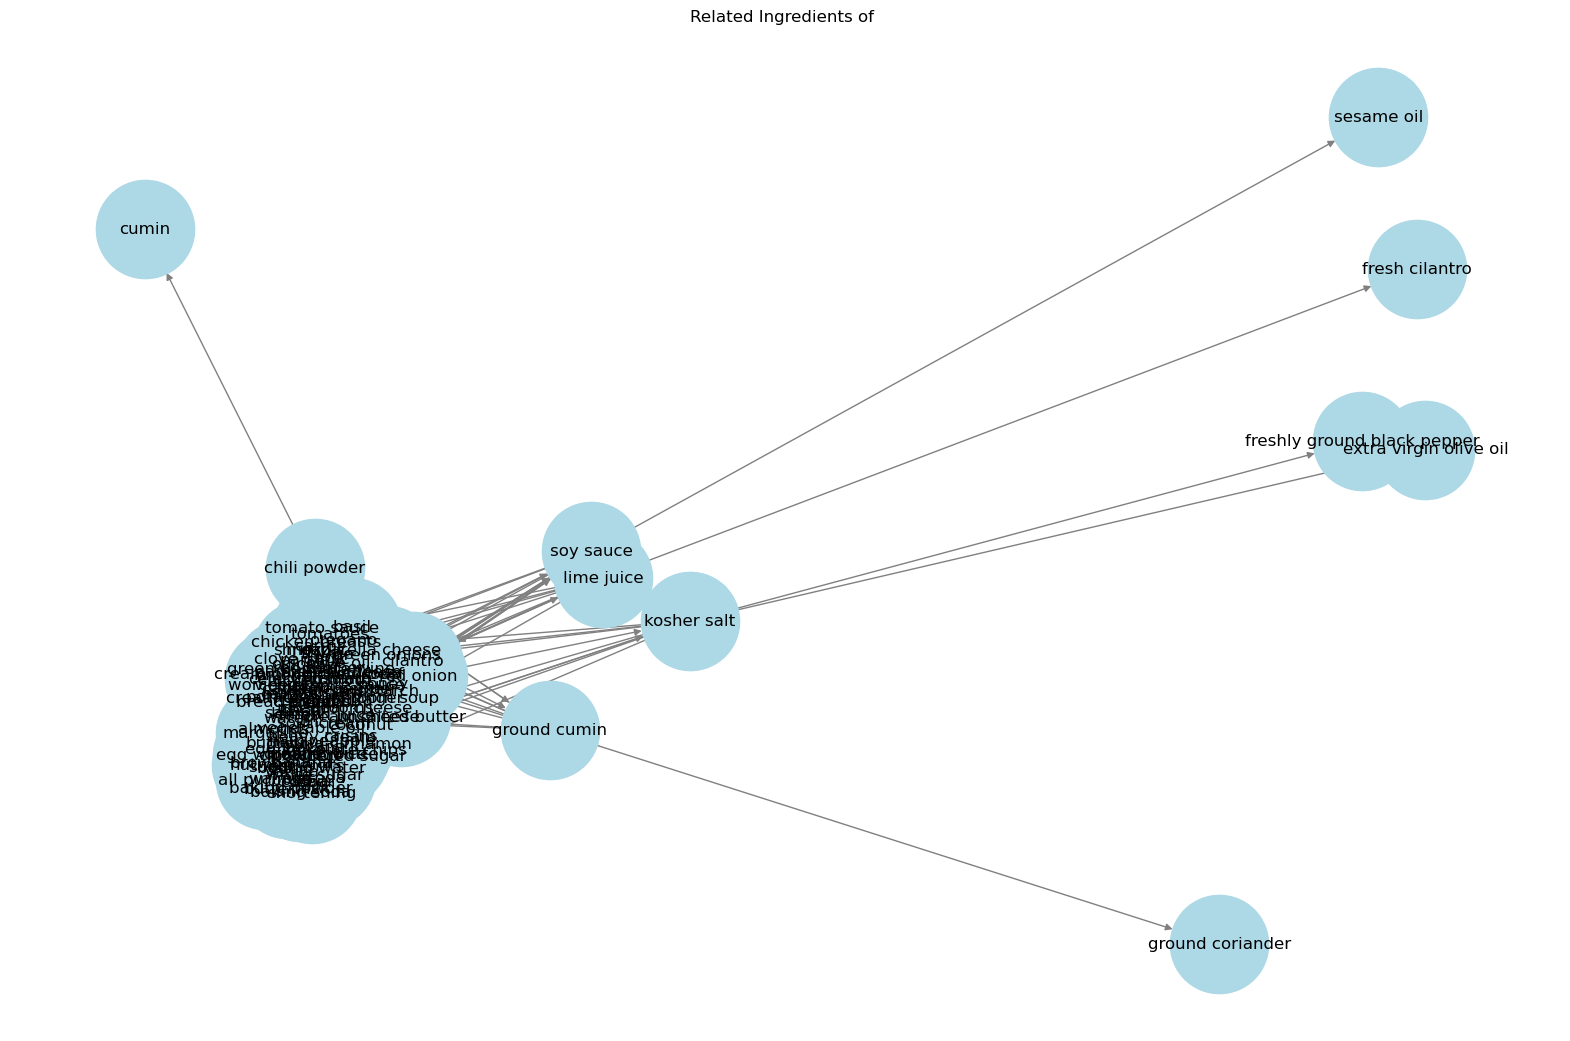

In [203]:
def plot_network(dataframe, ingredient_name=None):
    # Create a directed graph
    G = nx.DiGraph()
    
    if ingredient_name is not None:
        dataframe = dataframe[dataframe['Ingredient']==ingredient_name]
    else:
        ingredient_name = ""
        
    # Add nodes and edges from the dataframe
    for index, row in dataframe.iterrows():
        ingredient = row['Ingredient']
        related_ingredients = row['Related Ingredients']
        G.add_node(ingredient, label=ingredient)  # Add 'label' attribute to store the node name
        G.add_node(related_ingredients, label=related_ingredients)  # Add 'label' attribute to store the node name
        G.add_edge(ingredient, related_ingredients)

    # Plot the network
    plt.figure(figsize=(20, 13))
    pos = nx.spring_layout(G, seed=42)
    node_labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx(G, pos, with_labels=True, node_size=5000, node_color='lightblue', edge_color='gray', font_size=12, labels=node_labels)  # Use 'labels' argument to display node names
    plt.title("Related Ingredients of "+ingredient_name)
    
    # Show the plot
    plt.axis('off')
    plt.show()

plot_network(network_data)

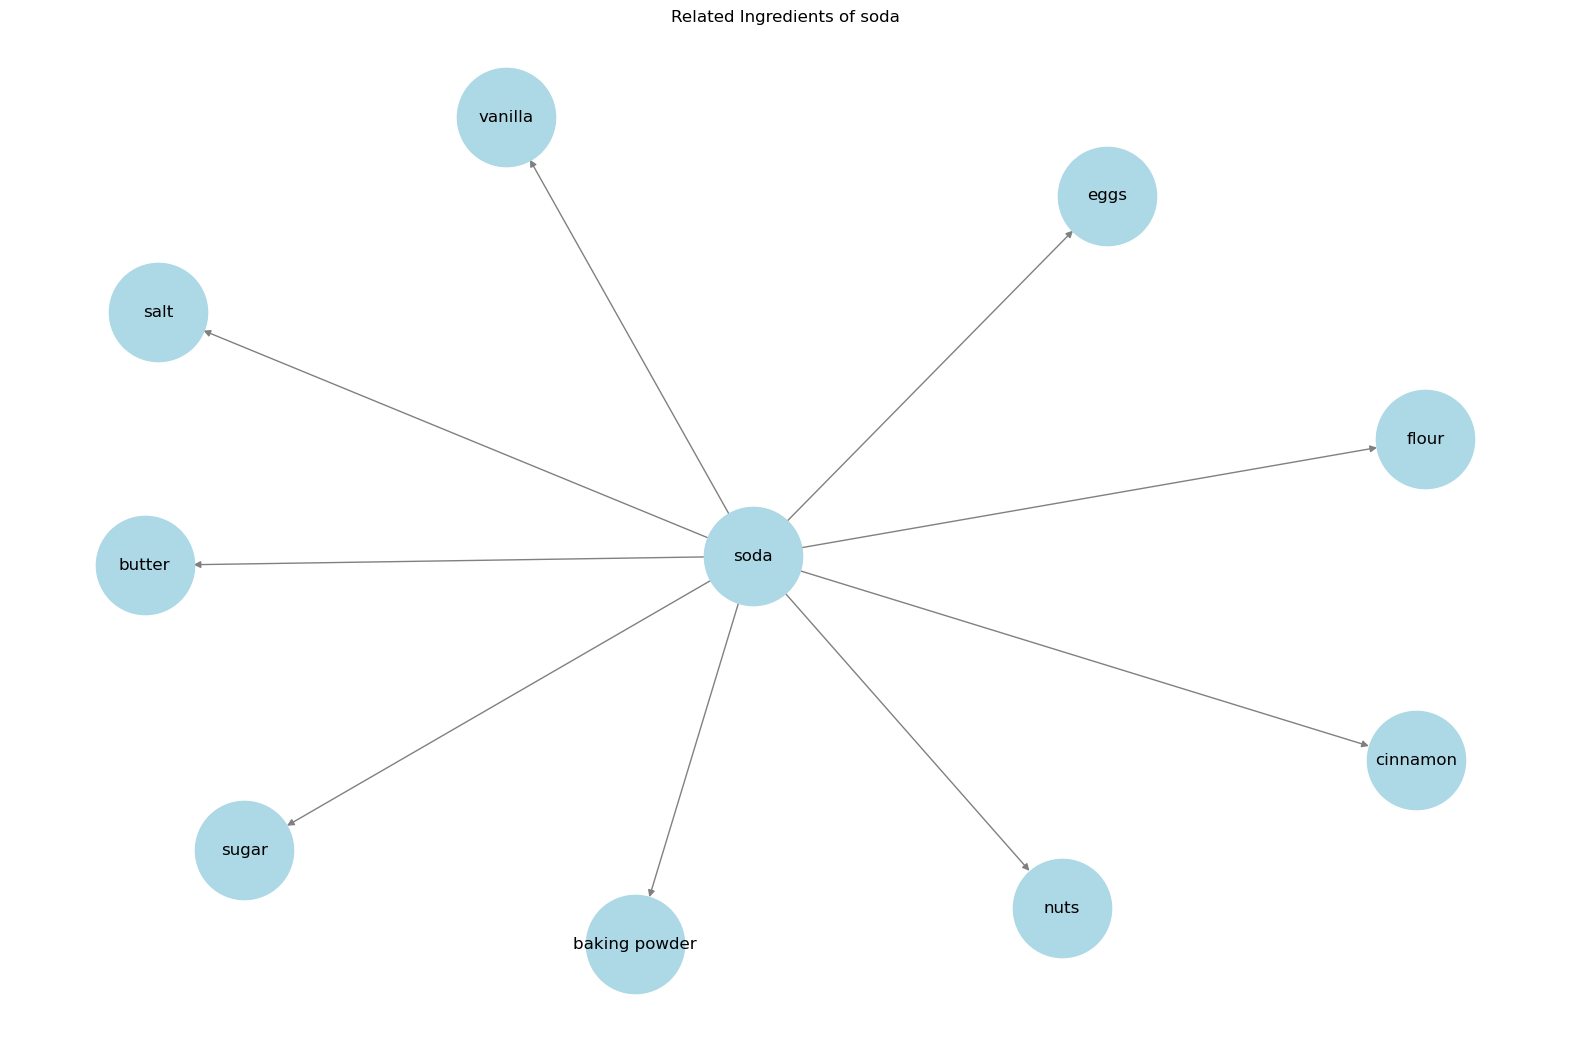

In [204]:
plot_network(network_data, "soda")

## Recipe Recommendation based on Ingredients

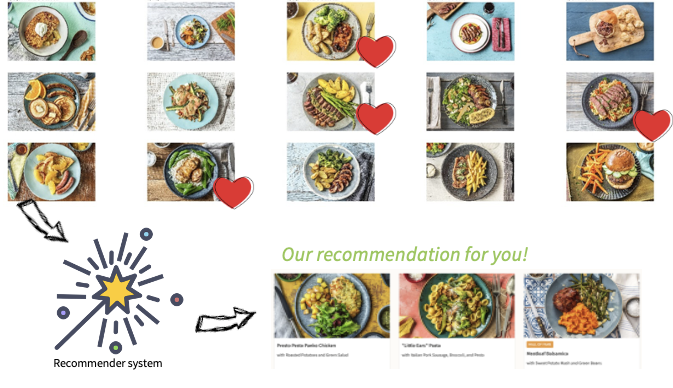

## Calculate TF=IDF of the recipes Ingredients


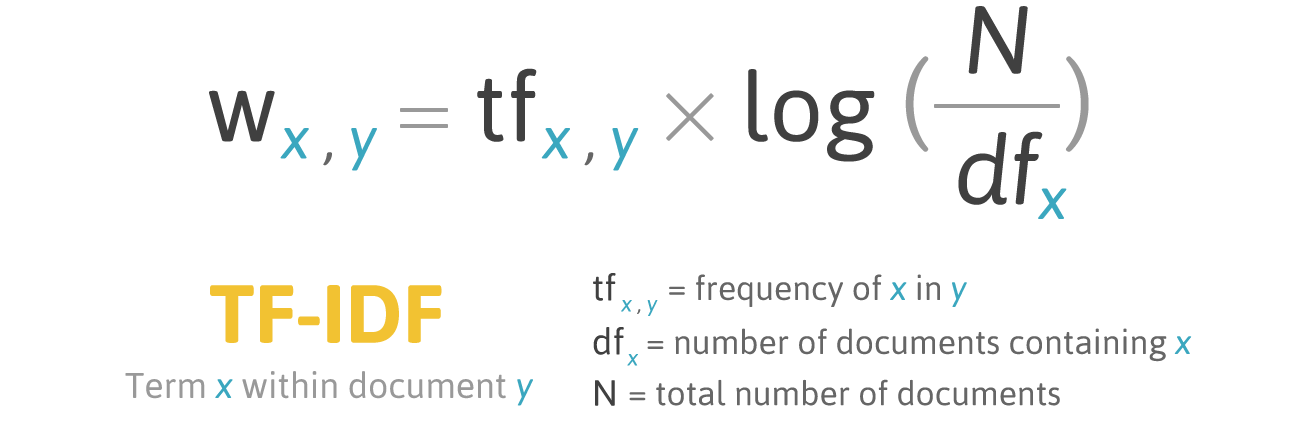

I have used only 10000 records for recommendation system

In [205]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df["NER"].astype(str)[1:-1][:10000])

## Find Cosine Similarity Matrix

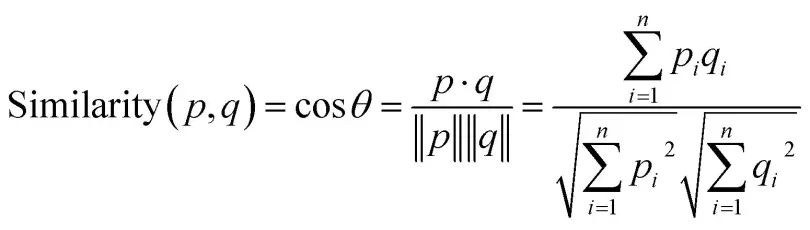

In [207]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [208]:
df_small = df.reset_index()[:10000]
titles = df_small['title']
indices = pd.Series(df_small.index, index=df_small['title'])

In [209]:
df_small['title'].values

array(['No-Bake Nut Cookies', "Jewell Ball'S Chicken", 'Creamy Corn', ...,
       'Chicken Casserole', 'Sweet Potatoes Casserole', '7 Layer Salad'],
      dtype=object)

In [210]:
def get_recommendations(title, no_of_recipes):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    recipe_indices = [i[0] for i in sim_scores]
    return titles.iloc[recipe_indices].head(no_of_recipes)

## System will recommend Top N recipes based on ingredients similarity

### Recommed Similar Recipes to Sweet Potatoes Casserole

In [211]:
recommended_recipes = get_recommendations("Sweet Potatoes Casserole", 10)
recommended_recipes

5359       The "Bestest" Banana Bread
7703                    Custard Sauce
623             Baked Pork Tenderloin
3164    Broccoli And Cheese Casserole
3842                 Strawberry Pizza
1952                    Pumpkin Bread
5075            Crustless Egg Custard
2005           Cathedral Window Candy
2385                    Quick Dessert
5969                  Chicken Lasagna
Name: title, dtype: object

### Recommed Similar Recipes to Creamy Corn

In [212]:
recommended_recipes = get_recommendations("Creamy Corn", 5)
recommended_recipes

8100               Peanut Butter Pie
3695    Baked Halibut, Italian Style
9641           Chinese Chicken Wings
446            Sour Cream Pound Cake
9470              Broccoli Casserole
Name: title, dtype: object

## Which Recipe I can make?

If in my kitchen, I have following list of ingredients let say:-

- 1 c. firmly packed brown sugar
- 1/2 c. evaporated milk
- 1/2 tsp. vanilla

Which recipe I can make out of available ingredients? this system will help us to assist in making recipes.

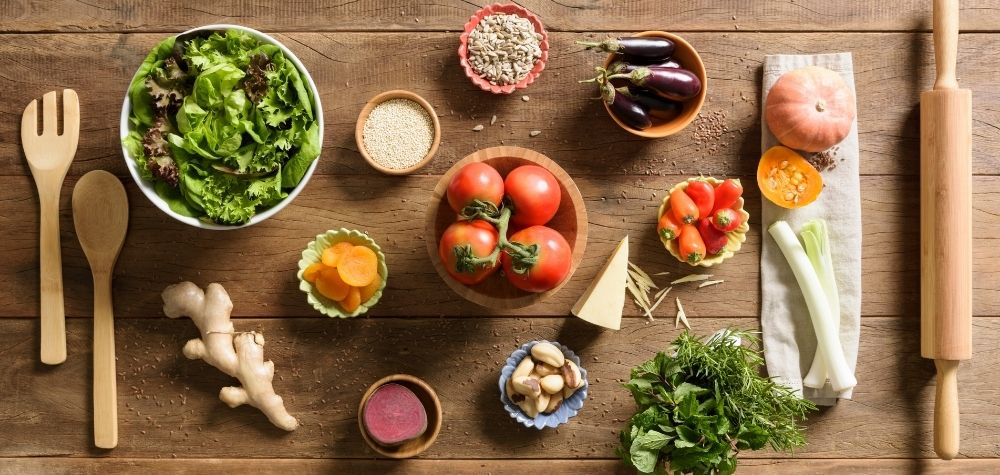

In [55]:
# Recipe data
recipe_data = df.head(1000)

def find_best_recipe(ingredients):
    best_recipe = None
    best_match_count = 0

    for _, recipe in recipe_data.iterrows():
        recipe_ingredients = recipe['ingredients']
        match_count = sum(1 for ingredient in ingredients if ingredient in recipe_ingredients)

        if match_count > best_match_count:
            best_recipe = recipe
            best_match_count = match_count

    return best_recipe

def print_recipe_directions(recipe, ingredients):
    directions = recipe['directions']
    
    print("You have ingredients:\n")
    print("\n".join(ingredients))
    print("\n")
    print("If you arrange following ingredient(s) then you can make Recipe:\n")
    
    extra = set(recipe['ingredients']).difference(set(ingredients))
    print("\n".join(extra))
    print("\n")
    
    print("Recipe Directions:\n")
    print("\n".join(directions))

## Show Recipe for available Ingredients

In [57]:
# List of ingredients
input_ingredients = ['1 c. firmly packed brown sugar', '1/2 c. evaporated milk', '1/2 tsp. vanilla']

# Find the best recipe
best_recipe = find_best_recipe(input_ingredients)

# Print the best recipe directions
if best_recipe is not None:
    print_recipe_directions(best_recipe, input_ingredients)
else:
    print("No matching recipe found.")

You have ingredients:

1 c. firmly packed brown sugar
1/2 c. evaporated milk
1/2 tsp. vanilla


If you arrange following ingredient(s) then you can make Recipe:

1/2 c. broken nuts (pecans)
3 1/2 c. bite size shredded rice biscuits
2 Tbsp. butter or margarine


Recipe Directions:

In a heavy 2-quart saucepan, mix brown sugar, nuts, evaporated milk and butter or margarine.
Stir over medium heat until mixture bubbles all over top.
Boil and stir 5 minutes more. Take off heat.
Stir in vanilla and cereal; mix well.
Using 2 teaspoons, drop and shape into 30 clusters on wax paper.
Let stand until firm, about 30 minutes.


## Recommend Recipe for Ingredients

- 1 box powdered sugar
- 8 oz. soft butter
- 1 (8 oz.) peanut butter
- paraffin

In [54]:
# List of ingredients
input_ingredients = ['1 box powdered sugar', '8 oz. soft butter', '1 (8 oz.) peanut butter', 'paraffin']

# Find the best recipe
best_recipe = find_best_recipe(input_ingredients)

# Print the best recipe directions
if best_recipe is not None:
    print_recipe_directions(best_recipe, input_ingredients)
else:
    print("No matching recipe found.")

You have ingredients:

1 box powdered sugar
8 oz. soft butter
1 (8 oz.) peanut butter
paraffin


If you arrange following ingredients then you can make Recipe:

12 oz. chocolate chips


Recipe Directions:

Mix sugar, butter and peanut butter.
Roll into balls and place on cookie sheet.
Set in freezer for at least 30 minutes. Melt chocolate chips and paraffin in double boiler.
Using a toothpick, dip balls 3/4 of way into chocolate chip and paraffin mixture to make them look like buckeyes.


## Generative AI for Directions Generation

One possible approach for generative AI is to use a text generation model called a Recurrent Neural Network (RNN) with the Long Short-Term Memory (LSTM) architecture. The LSTM model can be trained on the recipe directions from the dataset and then used to generate new recipe directions.

- We have used recipes ingredients as dataset for LSTM

- Tokenization is applied on dataset

- We have trained Deep Neural Network to create system that will generate directions for recipe by giving starting point.

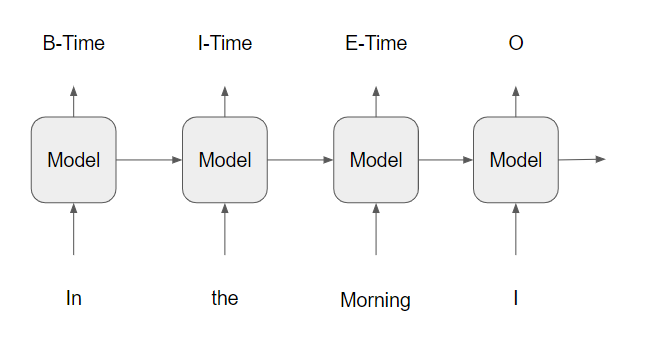

In [231]:
# Preprocess the recipe directions
directions = df['directions'].head(1000).values.tolist()

# Text preprocessing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(directions)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in directions:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences for input to the model
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Create predictors and label
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]

# Convert label to one-hot encoding
label = tensorflow.keras.utils.to_categorical(label, num_classes=total_words)

# Build the model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the model
model.fit(predictors, label, epochs=100, verbose=2)

Epoch 1/100
128/128 - 10s - loss: 8.4358 - 10s/epoch - 82ms/step
Epoch 2/100
128/128 - 7s - loss: 8.4406 - 7s/epoch - 52ms/step
Epoch 3/100
128/128 - 7s - loss: 8.3241 - 7s/epoch - 52ms/step
Epoch 4/100
128/128 - 7s - loss: 8.1545 - 7s/epoch - 51ms/step
Epoch 5/100
128/128 - 7s - loss: 7.8082 - 7s/epoch - 52ms/step
Epoch 6/100
128/128 - 7s - loss: 7.3336 - 7s/epoch - 52ms/step
Epoch 7/100
128/128 - 7s - loss: 6.7790 - 7s/epoch - 51ms/step
Epoch 8/100
128/128 - 7s - loss: 6.1823 - 7s/epoch - 52ms/step
Epoch 9/100
128/128 - 7s - loss: 5.5900 - 7s/epoch - 52ms/step
Epoch 10/100
128/128 - 7s - loss: 5.0163 - 7s/epoch - 51ms/step
Epoch 11/100
128/128 - 7s - loss: 4.4567 - 7s/epoch - 52ms/step
Epoch 12/100
128/128 - 7s - loss: 3.9323 - 7s/epoch - 52ms/step
Epoch 13/100
128/128 - 7s - loss: 3.4422 - 7s/epoch - 51ms/step
Epoch 14/100
128/128 - 7s - loss: 2.9918 - 7s/epoch - 52ms/step
Epoch 15/100
128/128 - 7s - loss: 2.5750 - 7s/epoch - 52ms/step
Epoch 16/100
128/128 - 7s - loss: 2.1964 - 7s/e

### How System Work?

- If we give input `In a large bowl, mix`
- Using DNN based system, it will geneate next text as
- `In a large bowl, mix peel and slice. set aside. put in casserole dish. brush with remaining barbecue sauce.`

In [238]:
# Generate new recipe directions
seed_text = "In a large bowl, mix"
next_words = 3

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')  # Modify maxlen argument
    predicted = model.predict(token_list, verbose=0)  # Replace predict_classes with predict
    
    predicted_word_index = np.argmax(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            output_word = word
            break
    seed_text += " " + output_word

# Print the generated recipe directions
print("Generated Directions:", seed_text)

Generated Directions: In a large bowl, mix peel and slice. set aside. put in casserole dish. brush with remaining barbecue sauce. conventional oven:


### Example 2

- If we give input `Get 2 tsp sugar and`
- Using DNN based system, it will geneate next text as
- `Get 2 tsp sugar and add water, frozen vegetables, potatoes and celery. turn cake out onto a heavy piece of aluminum foil which has been placed on a cookie sheet. bake in moderate oven until brown.`

In [240]:
# Generate new recipe directions
seed_text = "Get 2 tsp sugar and"
next_words = 3

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')  # Modify maxlen argument
    predicted = model.predict(token_list, verbose=0)  # Replace predict_classes with predict
    
    predicted_word_index = np.argmax(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            output_word = word
            break
    seed_text += " " + output_word

# Print the generated recipe directions
print("Generated Directions:", seed_text)

Generated Directions: Get 2 tsp sugar and add water, frozen vegetables, potatoes and celery. turn cake out onto a heavy piece of aluminum foil which has been placed on a cookie sheet. bake in moderate oven until brown.


## Clustering or Grouping of Recipes


- One possible use case is in the domain of recipe recommendation systems. By clustering recipes based on their ingredient similarity, we can identify groups of recipes that share common ingredients. This allows us to recommend alternative recipes to users based on their preferred ingredients or dietary restrictions. For example, if a user searches for a recipe containing chicken, the system can suggest other recipes from the same cluster that also feature chicken as a main ingredient.

- Another use case is in the analysis of recipe databases or food websites. Clustering recipes based on ingredients helps to organize and categorize a large collection of recipes. This can assist in structuring recipe repositories, making it easier for users to navigate and search for specific types of recipes. It can also help identify popular ingredient combinations and culinary trends.

- Additionally, the clustering results can provide insights into the relationships between different types of dishes or cuisines. By examining the clusters and their corresponding recipes, we can observe patterns and associations between ingredients used in specific culinary traditions or cultural contexts.

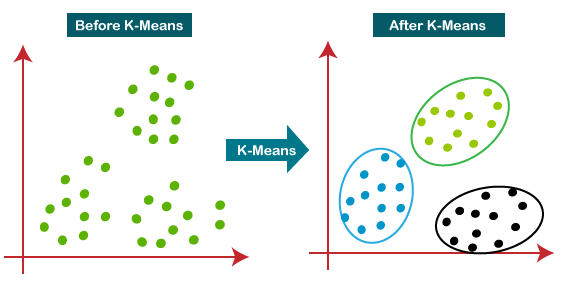

F:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


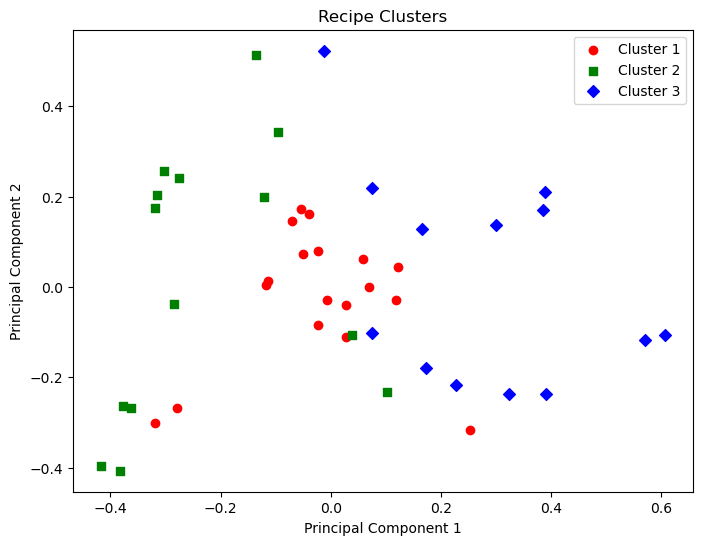


Cluster 1 Recipes:
Nolan'S Pepper Steak
Double Cherry Delight
Quick Barbecue Wings
Pink Stuff(Frozen Dessert)  
Fresh Strawberry Pie
Cuddy Farms Marinated Turkey
Spaghetti Sauce To Can
Prize-Winning Meat Loaf
Corral Barbecued Beef Steak Strips
One Hour Rolls
Punch Bowl Fruit Salad
Summer Chicken
Tuna Macaroni Casserole
Artichoke Dip
Summer Spaghetti
Watermelon Rind Pickles
Angel Biscuits
Quick Peppermint Puffs

Cluster 2 Recipes:
No-Bake Nut Cookies
Reeses Cups(Candy)  
Rhubarb Coffee Cake
Millionaire Pie
Buckeye Candy
Easy German Chocolate Cake
Broccoli Salad
Eggless Milkless Applesauce Cake
Grandma Hanrath'S Banana Breadfort Collins, Colorado  
Easy Fudge
Cherry Pizza
Chicken Stew
Quick Coffee Cake(6 Servings)  
Fruit Pizza

Cluster 3 Recipes:
Jewell Ball'S Chicken
Creamy Corn
Chicken Funny
Cheeseburger Potato Soup
Scalloped Corn
Taco Salad Chip Dip
Strawberry Whatever
Chocolate Frango Mints
Smothered Round Steak(Servings: 4)  
Taco-Filled Green Pepper
Potato And Cheese Pie
Broccoli

C:\Users\Admin\AppData\Local\Temp\ipykernel_11224\1220178402.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_data['Cluster'] = kmeans.labels_


In [60]:
# Load the recipe dataset
recipe_data = df.head(45)

# Preprocess NER column to extract ingredients

# Text vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(recipe_data['NER'].astype(str))

# Clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot recipe clusters
colors = ['red', 'green', 'blue']  # Customize cluster colors
markers = ['o', 's', 'D']  # Customize cluster markers

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_points = X_pca[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], marker=markers[i], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Recipe Clusters')
plt.legend()
plt.show()

# Display recipe clusters
recipe_data['Cluster'] = kmeans.labels_

for cluster_id in range(n_clusters):
    cluster_recipes = recipe_data[recipe_data['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id+1} Recipes:")
    for _, recipe in cluster_recipes.iterrows():
        print(recipe['title'])

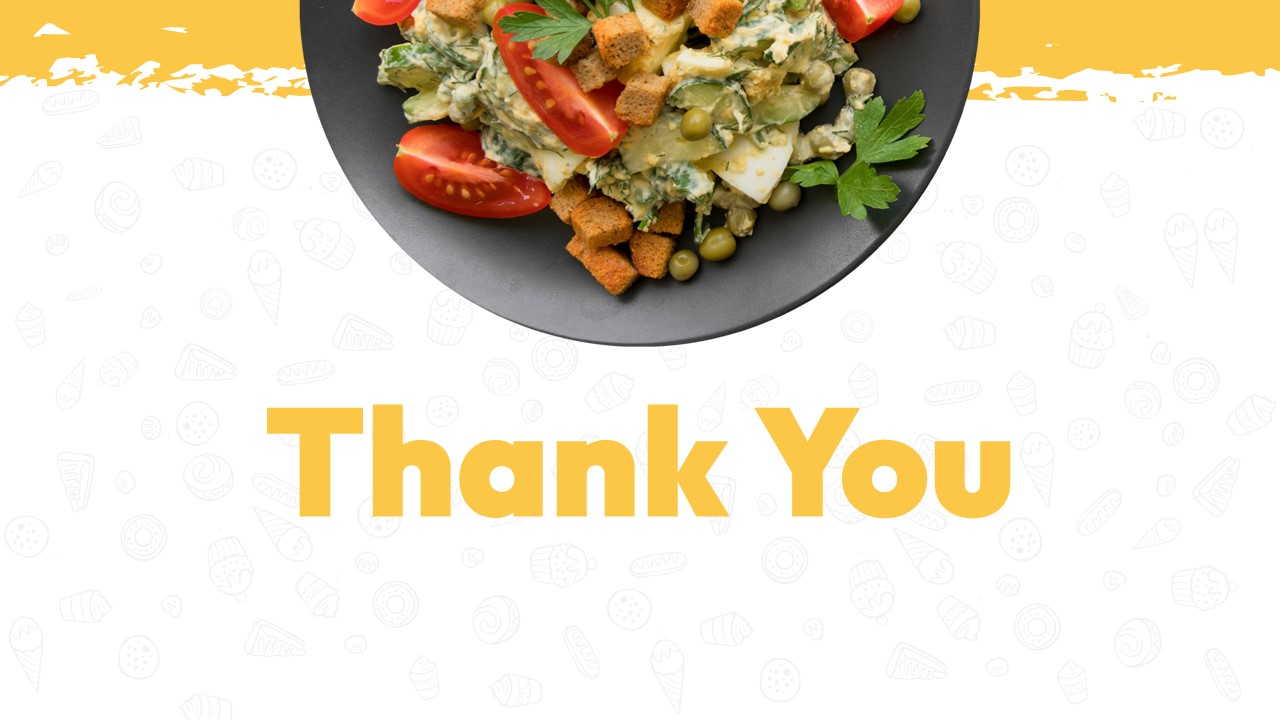